In [1]:
#importing libraries
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter 
import scipy
import json
import torchvision.transforms.functional as F
from matplotlib import cm as CM
from image import *
from model import CSRNet
import torch
%matplotlib inline

In [2]:
from torchvision import datasets, transforms
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [3]:
# Set the root to the Shanghai dataset
root = os.path.join(os.getcwd(), '..', 'dataset')
print(root)

/home/fiky/Desktop/test/people_counter/training/../dataset


In [4]:
#now generate the ShanghaiA's ground truth
part_A_train = os.path.join(root, 'part_A_final', 'train_data', 'images')
part_A_test = os.path.join(root, 'part_A_final', 'test_data', 'images')
part_B_train = os.path.join(root, 'part_B_final', 'train_data', 'images')
part_B_test = os.path.join(root, 'part_B_final', 'test_data', 'images')
path_sets = [part_A_test]

In [5]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [6]:
model = CSRNet()

In [7]:
#model = model.cuda()
model = model.to(torch.device('cpu'))

In [8]:
checkpoint = torch.load(os.path.join(root, 'PartAmodel_best.pth.tar'))

/usr/lib/python3.12/site-packages/torch/cuda/__init__.py:184: UserWarning: 
    Found GPU0 NVIDIA GeForce GTX 960M which is of cuda capability 5.0.
    PyTorch no longer supports this GPU because it is too old.
    The minimum cuda capability supported by this library is 5.2.
    
  warnings.warn(


In [9]:
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [24]:
mae = 0
for i in range(len(img_paths)):
    img = transform(Image.open(img_paths[i]).convert('RGB'))#.cuda()
    gt_file = h5py.File(img_paths[i].replace('.jpg','.h5').replace('images', 'ground_truth'), 'r')
    groundtruth = np.asarray(gt_file['density'])
    output = model(img.unsqueeze(0))
    mae += abs(output.detach().cpu().sum().numpy()-np.sum(groundtruth))
    print(i, mae)
print(mae/len(img_paths))

0 7.058136
1 72.55481
2 74.78229
3 81.7527
4 97.371735
5 136.04073
6 266.43124
7 296.83362
8 304.17255
9 733.5236
10 744.3752
11 934.87726
12 1066.3695
13 1147.0713
14 1177.3088
15 1211.3259
16 1212.0992
17 1267.6779
18 1337.8201
19 1599.633
20 1626.1694
21 1655.4592
22 1684.2122
23 1694.1182
24 1802.1947
25 1887.8682
26 2023.5208
27 2026.3416
28 2181.2734
29 2493.2788
30 2553.3198
31 2697.2454
32 2722.929
33 2877.0283
34 2911.9265
35 2964.2576
36 2994.9312
37 3001.4043
38 3047.5417
39 3169.7527
40 3194.7417
41 3204.8862
42 3274.0012
43 3275.8555
44 3277.055
45 3376.6072
46 3501.846
47 3518.803
48 3550.9775
49 3662.2346
50 3684.2249
51 3692.159
52 3700.7554
53 3719.2524
54 3766.9941
55 3769.8704
56 4062.0386
57 4171.4683
58 4259.1587
59 4318.7666
60 4354.12
61 4360.402
62 4444.216
63 4456.1724
64 4520.1333
65 4562.9146
66 4663.407
67 4717.1553
68 4786.885
69 4792.437
70 4793.083
71 4928.9854
72 4996.1494
73 5042.7373
74 5360.62
75 5383.1934
76 5384.8296
77 5503.029
78 5509.593
79 5682.

Predicted Count :  365


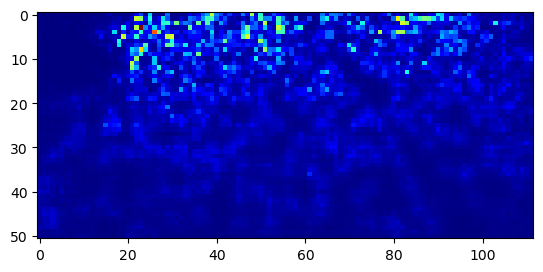

Original Count :  384


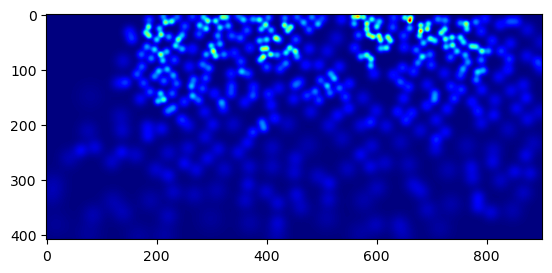

Original Image


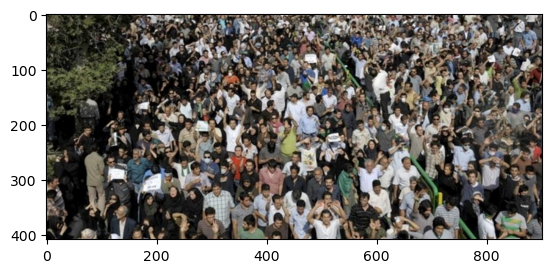

In [10]:
img = transform(Image.open(os.path.join(root, 'part_A_final', 'test_data', 'images', 'IMG_100.jpg')).convert('RGB'))#.cuda()

output = model(img.unsqueeze(0))
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = CM.jet)
plt.show()
temp = h5py.File(os.path.join(root, 'part_A_final', 'test_data', 'ground_truth', 'IMG_100.h5'), 'r')
temp_1 = np.asarray(temp['density'])
plt.imshow(temp_1,cmap = CM.jet)
print("Original Count : ",int(np.sum(temp_1)) + 1)
plt.show()
print("Original Image")
plt.imshow(plt.imread(os.path.join(root, 'part_A_final', 'test_data', 'images', 'IMG_100.jpg')))
plt.show()